In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns



```
# I used the upcoming library and statement to upload my data in to google colab files so i can directly import my csv file without using filepaths.
so that is optional.

```



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
#To look at the dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#To know more about the data.
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#The isnull() is used to check whether a data is Null or not, sum() aggragates the null values of each column
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#handling missing value
data['Age'].fillna(data['Age'].median(), inplace=True)
data.drop('Cabin',axis=1,inplace=True)

Text(0, 0.5, 'Count')

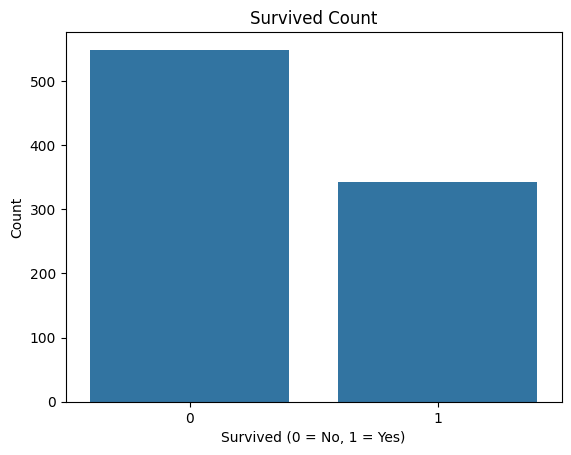

In [ ]:
data['Survived'] = data['Survived'].astype(int)

# Create the count plot
#countplot is used when we need to view the balance of a value
sns.countplot(x='Survived', data=data)
plt.title('Survived Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')

Text(0.5, 1.0, 'Age Distribution')

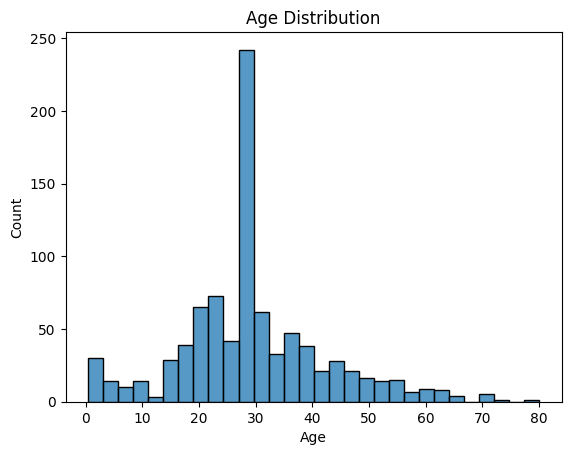

In [ ]:
#Histograms can also be used to visualise
sns.histplot(data['Age'],kde=False)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Sex vs Survived')

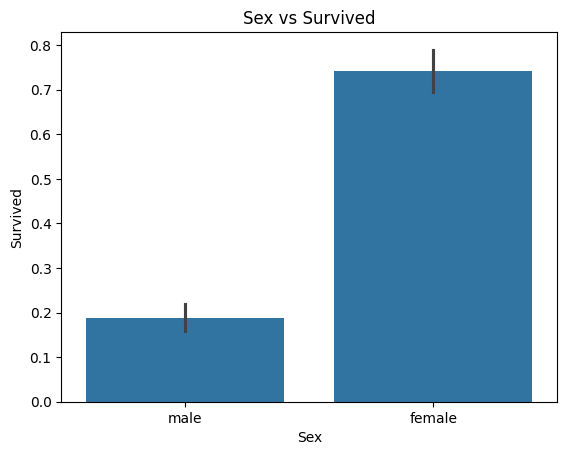

In [ ]:
#barplots are used to compare two variables
sns.barplot(x='Sex',y='Survived',data=data)
plt.title('Sex vs Survived')

Text(0.5, 1.0, 'Sex vs Survived')

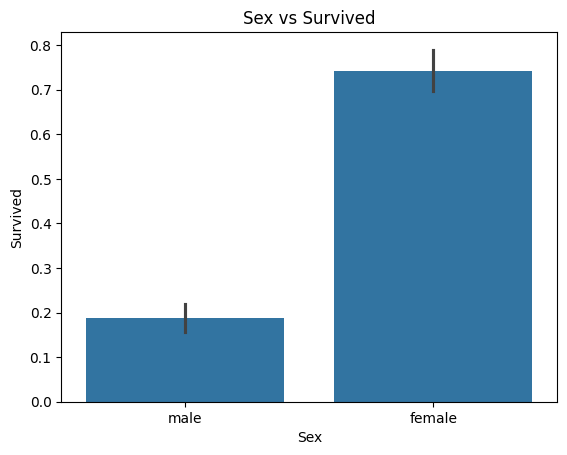

In [ ]:
#In bar plots, two variables can be compared and an assumption that 0.2 of 10 or 20% percentage of overall male in titanic survived
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Sex vs Survived')

Text(0.5, 1.0, 'Pclass,Sex vs Survived')

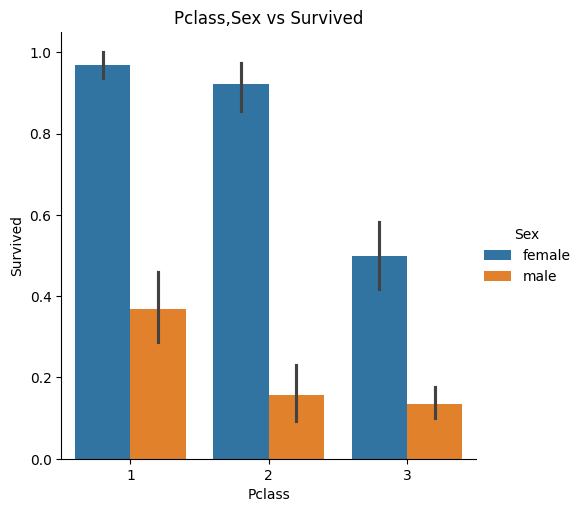

In [ ]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',kind='bar',data=data)
plt.title('Pclass,Sex vs Survived')

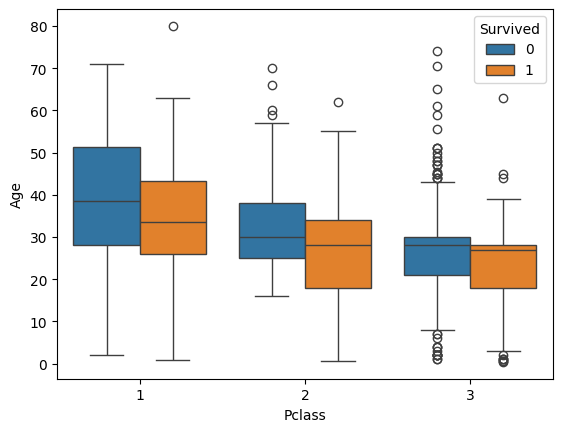

In [ ]:
#The box is where the range of ages that survived lie, the small cricles are the outliers
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=data)
plt.show()
plt.title('Pclass,Age vs Survived')

In [ ]:
data.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
#selecting only the numerical datas
numeric_data = data.select_dtypes(include=['float64', 'int64'])
corr = numeric_data.corr()

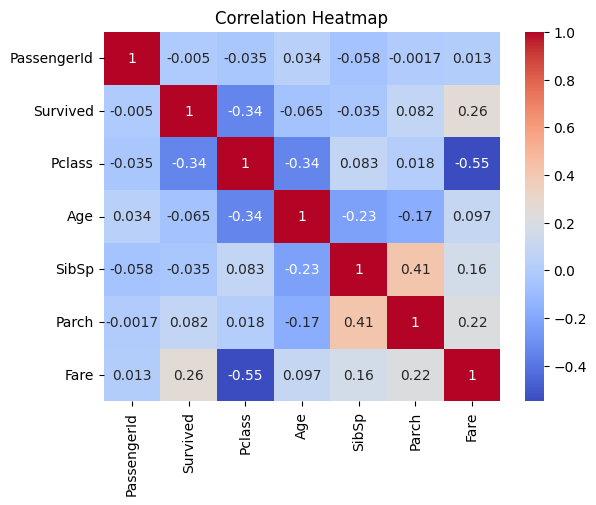

In [ ]:
#viewing correlation
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#CONCLUSION
1.Survival Rate by Gender: Females had a significantly higher survival rate compared to males, indicating a gender-based disparity in survival chances during the Titanic disaster.

2.Age Distribution: The age distribution revealed that younger passengers (children) had higher survival rates, while older passengers tended to have lower survival rates.

3.Impact of Passenger Class: Passengers in 1st class had a much higher survival rate than those in 2nd and 3rd class, highlighting the socio-economic factors influencing survival.

4.Age and Passenger Class Interaction: The age of passengers varied across different classes, with 1st class passengers generally being older than those in 3rd class, which could affect survival outcomes.

5.Outliers in Age: There were notable outliers in the age distribution, such as extremely young or old passengers, which might require special attention in further analysis.

6.Survival Rate by Passenger Class: The bar plots showed that survival rates were highest in 1st class, followed by 2nd class, and lowest in 3rd class, reinforcing socio-economic influences.

7.Age vs. Survival: Box plots indicated that survival rates differed by age group, with specific age ranges showing more survivors, particularly among younger passengers.

8.Count of Passengers: Count plots revealed the distribution of passengers across different classes and genders, providing insight into the demographics of the passengers.

9.Correlation Analysis: The correlation heatmap highlighted relationships between various numerical variables, such as age and survival, helping to identify significant predictors.

10.Missing Values: EDA might have revealed missing values in the dataset, particularly in the age column, indicating the need for imputation or other handling techniques before analysis.